In [1]:
from Designer import SST, figure, show
from math import sqrt

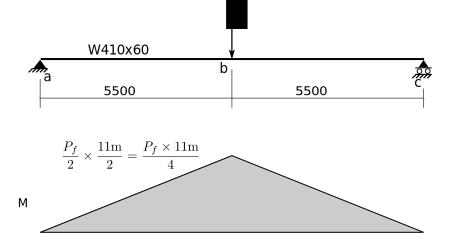

In [2]:
figure("eg-F10.svg")

In [3]:
phi = 0.9
Fy = 345.
Dsg,d,b,t,w,Ix,Zx,Iy,J,Cw = SST.section('W410x60','Dsg,D,B,T,W,Ix,Zx,Iy,J,Cw')
h = d - 2*t
show('Dsg,d,b,t,w,h,*10**6,Ix,Iy,*10**3,Zx,J,*10**9,Cw,*,Fy')

Dsg = W410x60      
d   = 407          
b   = 178          
t   = 12.8         
w   = 7.7          
h   = 381.4        
Ix  = 216 * 10**6  
Iy  = 12 * 10**6   
Zx  = 1190 * 10**3 
J   = 328 * 10**3  
Cw  = 468 * 10**9  
Fy  = 345          


## Check Local Buckling

In [4]:
show('bel/t = b/(2*t), 170/sqrt(Fy)')  # check flange against class 2 limits

bel/t        = 6.953 
170/sqrt(Fy) = 9.152 


In [5]:
show('h/w, 1700/sqrt(Fy)')  # check web against class 2 limits

h/w           = 49.53 
1700/sqrt(Fy) = 91.52 


Therefore section is class 2 (or perhaps class 1 - that doesn't matter)

## Case a) fully braced

From $\S$ 13.5: $
M_r = \phi M_p = \phi F_y Z_x
$

In [6]:
Mr = phi*Fy*Zx * 1E-6   # * 1E-6 converts from N-mm to kN-m
Pf = Mr * 4. / 11.
show('Mr,Pf')

Mr = 369.5 
Pf = 134.4 


#### For case a), maximum $P_f = 134~\text{kN}$.
----------------

## Case b) lateral bracing at supports only

The last paragraph of $\S$ 13.6 a) says the following:

>   _For unbraced beam segments loaded above the shear centre between brace points, where the method of load delivery
   to the member provides neither lateral nor rotational restraint to the member, the associated destabilizing effect
   shall be taken into account using a rational method.  For loads applied at the level of the top flange,
   in lieu of a more accurate analysis, $M_u$ may be determined using $\omega_2 = 1.0$ and using an effective
   length, for pin-ended beams, of $1.2 L$ and for all other cases, $1.4 L$._
   
It seems reasonable that the above should apply to this case, so  use an unbraced length of compression
flange equal to 1.2 times the distance between supports.

S16-16 $\S$ 13.6 a) ii) gives the following for calculating $M_u$:

$$
M_u = \frac{\omega_2 \pi}{L} \sqrt{ E I_y G J + \left(\frac{\pi E}{L}\right)^2 I_y C_w}
$$

Often, we re-write that to make it a little simpler to apply manually:

$$
A = E I_y G J
$$

$$
B = \left(\frac{\pi E}{L}\right)^2 I_y C_w
$$

$$
M_u = \frac{\omega_2 \pi}{L} \sqrt{ A + B }
$$

In [7]:
pi = 3.14159
E = 200000.
G = 77000.

In [8]:
omega2 = 1.0
L = 1.2*11000
A = E*Iy*G*J
B = Iy*Cw*(pi*E/L)**2
Mu = (omega2*pi/L)*sqrt(A+B) * 1E-6   # for result in kN-m

Mp = Fy*Zx * 1E-6

show('omega2,L,A,B,Mu,Mp,0.67*Mp')

omega2  = 1         
L       = 13200     
A       = 6.061e+22 
B       = 1.272e+22 
Mu      = 64.45     
Mp      = 410.6     
0.67*Mp = 275.1     


As $M_u \le 0.67 M_p$, $M_r = \phi M_u$:

In [9]:
Mr = phi*Mu
Pf = Mr * 4. / 11.
show('Mr,Pf')

Mr = 58.01 
Pf = 21.09 


#### For case b), maximum $P_f = 21.1~\text{kN}$.
------------------

## Case c) Lateral bracing at ends and at centre

From Figure 2-17 in the commentary, $\omega_2 = 1.75$.

Or, the long way from $\S$ 13.6 a) ii):

$
\kappa = 0
$

(because in the beam segments between the brace points, _ab_ and _bc_, the smallest end moment is 0,
and $0/anything$ is zero, as long as $anything \ne 0$).

And then:

$
\omega_2 = 1.75 + 1.05\kappa + 0.3\kappa^2 = 1.75
$

In [10]:
omega2 = 1.75
L = 5500.
A = E*Iy*G*J
B = Iy*Cw*(pi*E/L)**2
Mu = (omega2*pi/L)*sqrt(A+B) * 1E-6   # for result in kN-m

Mp = Fy*Zx * 1E-6

show('omega2,L,A,B,Mu,Mp,0.67*Mp')

omega2  = 1.75      
L       = 5500      
A       = 6.061e+22 
B       = 7.329e+22 
Mu      = 365.8     
Mp      = 410.6     
0.67*Mp = 275.1     


In this case, $M_u > 0.67 M_p$ and thus $M_r$ is given by $\S$ 13.6 a) i):

In [11]:
Mr = min( 1.15*phi*Mp*(1 - 0.28*Mp/Mu), phi*Mp )
Pf = Mr * 4. / 11.
show('Mr,Pf')

Mr = 291.4 
Pf = 106   


#### For case c) maximum $P_f = 106~\text{kN}$.
--------------